# Lesson 4

## 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/European_roulette_wheel.svg/800px-European_roulette_wheel.svg.png" style="width: 300px;"/>

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def roulette():
    pool = [
        0, 32, 15, 19, 4, 21, 2, 25, 17, 34, 6, 27,
        13, 36, 11, 30, 8, 23, 10, 5, 24, 16, 33, 1,
        20, 14, 31, 9, 22, 18, 29, 7, 28, 12, 35, 3, 26
    ]
    num = random.choice(pool)
    if pool.index(num) % 2 != 0 and num != 0:
        color = 'red'
    elif pool.index(num) % 2 == 0 and num != 0:
        color = 'black'
    else:
        color = ''
    return num, color

In [3]:
result = pd.Series([0 for _ in range(37)], index=[i for i in range(37)])

In [4]:
for _ in range(1000):
    result[roulette()[0]] += 1

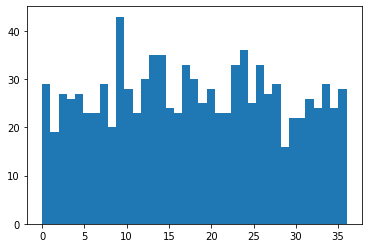

In [5]:
plt.hist(result.index, bins=37, weights=result)
plt.show()

## 2.
### 1. Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [6]:
date = pd.DataFrame({'count': [0 for _ in range(37)]})

In [7]:
pool = [
    0, 32, 15, 19, 4, 21, 2, 25, 17, 34, 6, 27,
    13, 36, 11, 30, 8, 23, 10, 5, 24, 16, 33, 1,
    20, 14, 31, 9, 22, 18, 29, 7, 28, 12, 35, 3, 26
]
for i in date.index:
    if pool.index(i) % 2 != 0 and i != 0:
        date.loc[i, 'color'] = 'red'
    elif pool.index(i) % 2 == 0 and i != 0:
        date.loc[i, 'color'] = 'black'

In [8]:
for _ in range(10000):
    num = roulette()[0]
    date.loc[num, 'count'] += 1

Вероятность выпадения красного

In [9]:
P_red = date.loc[date['color'] == 'red', 'count'].sum() \
                                / date['count'].sum()
P_red

0.4841

Вероятность выпадения черного

In [10]:
P_black = date.loc[date['color'] == 'black', 'count'].sum() \
                                  / date['count'].sum()
P_black

0.4854

Вероятность выпадения черного и красного

In [11]:
date.loc[~date['color'].isnull(), 'count'].sum() / date['count'].sum()

0.9695

In [12]:
P_red + P_black

0.9695

### 2. Сгенерируйте десять выборок случайных чисел $х_0, …, х_9$. И постройте гистограмму распределения случайной суммы $х_0+х_1+ …+ х_9$.

In [13]:
import numpy as np

In [14]:
x = pd.DataFrame([np.random.rand(10) for _ in range(10)])

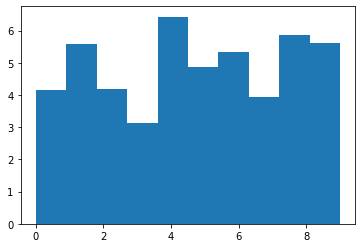

In [15]:
plt.hist(x.index, weights=x.T.sum())
plt.show()

## 3.
### 1. Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [16]:
import numpy as np
import math

In [17]:
k = 0
n = 10_000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(len(x)):
    if x[i] == 2:
        k += 1
print(k, n, k/n)

3781 10000 0.3781


In [18]:
k = 2
n = 4

In [19]:
c = (math.factorial(n) / (math.factorial(k) * math.factorial(n - k)))

In [20]:
P = c * 1/2**n
P

0.375

### 2. Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [21]:
k = 0
n = 10_000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
f = np.random.randint(0, 2, n)
e = np.random.randint(0, 2, n)
x = a + b + c + d + f + e
for i in range(len(x)):
    if x[i] == 3:
        k += 1
print(k, n, k/n)

3160 10000 0.316


In [22]:
k = 3
n = 6

In [23]:
c = (math.factorial(n) / (math.factorial(k) * math.factorial(n - k)))

In [24]:
P = c * 1/2**n
P

0.3125

## 4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k


In [25]:
import itertools

In [26]:
for p in itertools.permutations('012345', 2):
    print(*p, sep='')

01
02
03
04
05
10
12
13
14
15
20
21
23
24
25
30
31
32
34
35
40
41
42
43
45
50
51
52
53
54


$$
A_n^k = (n-k+1)
$$

In [27]:
n = 6
k = 2
n * (n - k + 1)

30

In [28]:
for p in itertools.combinations('012345', 2):
    print(*p, sep='')

01
02
03
04
05
12
13
14
15
23
24
25
34
35
45


$$
c^k_n = \frac{n!}{k!(n-k)!}
$$

In [29]:
n = 6
k = 2
math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

15.0

## 5. Дополните код расчетом коэффициента корреляции x и y по формуле:
$$
R = \frac {\sum(x_i - x_m)(y_i - y_m)}{\sqrt{(x_i - x_m)^2(y_i - y_m)^2}}
$$

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

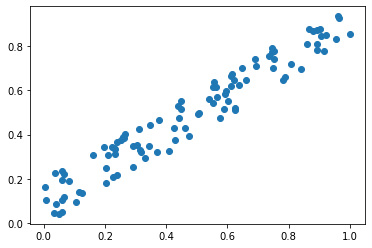

In [31]:
n = 100
r = 0.8
x =np.random.rand(n)
y = r * x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')

In [32]:
np.corrcoef(x,y)

array([[1.        , 0.96772873],
       [0.96772873, 1.        ]])

In [33]:
np.sum((x - x.mean()) * (y - y.mean())) / np.sqrt(np.sum((x - x.mean()) ** 2) * np.sum((y - y.mean()) ** 2))

0.9677287329261209